# high-order correlation visualization 

In [3]:
import pandas as pd
import numpy as np
import ast

In [4]:
training_path = r"/home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/data/project_using_data/all_train_data_4_12_AP_PA.csv"
training_data = pd.read_csv(training_path)
training_data.head(1)

,dicom_id,study_id,subject_id,split,original_14_labels,strategy1_14_labels,ViewPosition,project_3_classes_14_labels,image_file_path,BiomedClip_img_tensor_path,Clip_img_tensor_path
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",PA,"[0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0]",/public_bme/data/lds//p10/p10000032/s50414267/...,/public_bme/data/lds//p10/p10000032/s50414267/...,/public_bme/data/lds//p10/p10000032/s50414267/...


#### get co-occurrence matrix

In [6]:
training_strategy1_14_labels = training_data["strategy1_14_labels"].tolist()
# strategy1_14_labels = np.array(strategy1_14_labels)
# strategy1_14_labels

training_strategy1_14_labels = [ast.literal_eval(s) for s in training_strategy1_14_labels]

# print(training_strategy1_14_labels)
standard_list = np.array(training_strategy1_14_labels)

In [9]:
data_transpose = standard_list.T

# 计算共现矩阵
co_occurrence_matrix = np.dot(data_transpose, standard_list)
print(co_occurrence_matrix.shape)

(14, 14)


In [10]:
# 初始化共现矩阵
num_diseases = len(standard_list[0])
co_occurrence_matrix_1 = [[0] * num_diseases for _ in range(num_diseases)]

# 遍历每一列（疾病）
for i in range(num_diseases):
    for j in range(i + 1, num_diseases):  # 避免重复计算同一对疾病的共现
        # 遍历每一行（记录）
        for record in standard_list:
            if record[i] == 1 and record[j] == 1:  # 判断是否同时存在
                co_occurrence_matrix_1[i][j] += 1
                co_occurrence_matrix_1[j][i] += 1  # 共现矩阵是对称的，因此需要同时更新两个位置

# 输出共现矩阵
print("共现矩阵:")
for row in co_occurrence_matrix_1:
    print(row)

共现矩阵:
[0, 14450, 3251, 12063, 2768, 1131, 1355, 19129, 0, 23681, 353, 4559, 3070, 22329]
[14450, 0, 2379, 14429, 1533, 842, 796, 10557, 0, 16083, 463, 3047, 1774, 19404]
[3251, 2379, 0, 3128, 496, 151, 481, 2633, 0, 5198, 96, 2045, 552, 5135]
[12063, 14429, 3128, 0, 1641, 459, 693, 12031, 0, 17520, 321, 4050, 1027, 15331]
[2768, 1533, 496, 1641, 0, 195, 351, 2245, 0, 2487, 101, 465, 590, 3391]
[1131, 842, 151, 459, 195, 0, 88, 845, 0, 995, 144, 144, 429, 1252]
[1355, 796, 481, 693, 351, 88, 0, 2639, 0, 1621, 151, 617, 258, 1274]
[19129, 10557, 2633, 12031, 2245, 845, 2639, 0, 0, 15814, 717, 7497, 2059, 17669]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9861]
[23681, 16083, 5198, 17520, 2487, 995, 1621, 15814, 0, 0, 508, 4441, 3104, 23305]
[353, 463, 96, 321, 101, 144, 151, 717, 0, 508, 0, 173, 111, 558]
[4559, 3047, 2045, 4050, 465, 144, 617, 7497, 0, 4441, 173, 0, 247, 4134]
[3070, 1774, 552, 1027, 590, 429, 258, 2059, 0, 3104, 111, 247, 0, 5709]
[22329, 19404, 5135, 15331, 3391, 1252, 12

In [40]:
print(CHEXPERT_LABELS_meanings.index("Fracture"))
co_occurrence_matrix_1[CHEXPERT_LABELS_meanings.index("Fracture")]

5


[1131, 842, 151, 459, 195, 0, 88, 845, 0, 995, 144, 144, 429, 1252]

In [42]:
print(CHEXPERT_LABELS_meanings.index("Edema"))
co_occurrence_matrix_1[CHEXPERT_LABELS_meanings.index("Edema")]

3


[12063,
 14429,
 3128,
 0,
 1641,
 459,
 693,
 12031,
 0,
 17520,
 321,
 4050,
 1027,
 15331]

In [43]:
Atelectasis = [{'id': 'Labels', 'datum': 6964195249, 'children' : [
              {'id' : "Atelectasis", 'datum': 450448697,
                   'children' : [
                     {'id' : "Cardiomegaly", 'datum' : 14450},
                     {'id' : "Consolidation", 'datum' : 3251},
                     {'id' : "Edema", 'datum' : 12063} ,
                     {'id' : "Enlarged \nCardiomediastinum", 'datum' : 2768},
                     {'id' : "Fracture", 'datum' : 1131},
                     {'id' : "Lung Lesion", 'datum' : 1355},
                     {'id' : "Lung Opacity", 'datum' : 19129},
                     {'id' : "No Finding", 'datum' : 0},
                     {'id' : "Pleural Effusion", 'datum' : 23681},
                    {'id' : "Pleural Other", 'datum' : 353},
                     {'id' : "Pneumonia", 'datum' : 4559},
                     {'id' : "Pneumothorax", 'datum' : 3070} ,
                      {'id' : "Support Devices", 'datum' : 22329},
                     
                   ]},
              ]}]

Fracture = [{'id': 'Labels', 'datum': 6964195249, 'children' : [
              {'id' : "Fracture", 'datum': 450448697,
                   'children' : [
                     {'id' : "Atelectasis", 'datum' : 1131},
                     {'id' : "Cardiomegaly", 'datum' : 842},
                     {'id' : "Consolidation", 'datum' : 151},
                     {'id' : "Edema", 'datum' : 459} ,
                     {'id' : "Enlarged \nCardiomediastinum", 'datum' : 195},
                     {'id' : "Lung Lesion", 'datum' : 88},
                     {'id' : "Lung Opacity", 'datum' : 845},
                     {'id' : "No Finding", 'datum' : 0},
                     {'id' : "Pleural Effusion", 'datum' : 995},
                    {'id' : "Pleural Other", 'datum' : 144},
                     {'id' : "Pneumonia", 'datum' : 144},
                     {'id' : "Pneumothorax", 'datum' : 429} ,
                      {'id' : "Support Devices", 'datum' : 1252},
                     
                   ]},
              ]}]

Edema = [{'id': 'Labels', 'datum': 6964195249, 'children' : [
              {'id' : "Edema", 'datum': 450448697,
                   'children' : [
                     {'id' : "Atelectasis", 'datum' : 12063} ,
                     {'id' : "Cardiomegaly", 'datum' : 14429},
                     {'id' : "Consolidation", 'datum' : 3128},
                     {'id' : "Enlarged \nCardiomediastinum", 'datum' : 1641},
                     {'id' : "Fracture", 'datum' : 459},
                     {'id' : "Lung Lesion", 'datum' : 693},
                     {'id' : "Lung Opacity", 'datum' : 12031},
                     {'id' : "No Finding", 'datum' : 0},
                     {'id' : "Pleural Effusion", 'datum' : 17520},
                    {'id' : "Pleural Other", 'datum' : 321},
                     {'id' : "Pneumonia", 'datum' : 4050},
                     {'id' : "Pneumothorax", 'datum' : 1027} ,
                      {'id' : "Support Devices", 'datum' : 15331},
                     
                   ]},
              ]}]

In [16]:
CHEXPERT_LABELS_meanings = [
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 "Support Devices"
]


CHEXPERT_LABELS = [
 'Atel',
 'Card',
 'Cons',
 'Edem',
 'EnCa',
 'Frac',
 'LuLe',
 'LuOp',
 'NoFi',
 'PlEf',
 'PlOt',
 'Pnia',
 'Prax',
 "SuDe"
]


#### draw circlify

In [24]:
data = [{'id': 'Labels', 'datum': 6964195249, 'children' : [
              {'id' : "Edema", 'datum': 450448697,
                   'children' : [
                     {'id' : "Lung \nOpacity", 'datum' : 108865000},
                     {'id' : "Consolidation", 'datum' : 107550697},
                     {'id' : "Pneumonia", 'datum' : 159999999} ,
                     {'id' : "Enlarged \nCardiomediastinum", 'datum' : 30816500},
                     {'id' : "Cardiomegaly", 'datum' : 70000697},
                     {'id' : "Pneumonia", 'datum' : 34033000},
                     {'id' : "Lung Lesion", 'datum' : 100865910},
                     {'id' : "No Finding", 'datum' : 10755997},
                     {'id' : "Atelectasis", 'datum' : 3403300},
                    {'id' : "Pneumothorax", 'datum' : 30886500},
                     {'id' : "Pleural Effusion", 'datum' : 10755069},
                     {'id' : "Pleural Other", 'datum' : 34033099} ,
                      {'id' : "Fracture", 'datum' : 308865},
                     {'id' : "Support Devices", 'datum' : 107550},
                   ]},
              ]}]

In [36]:
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    Atelectasis, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

min to max ratio is too low at 0.000000 and it could cause algorithm stability issues. Try to remove insignificant data


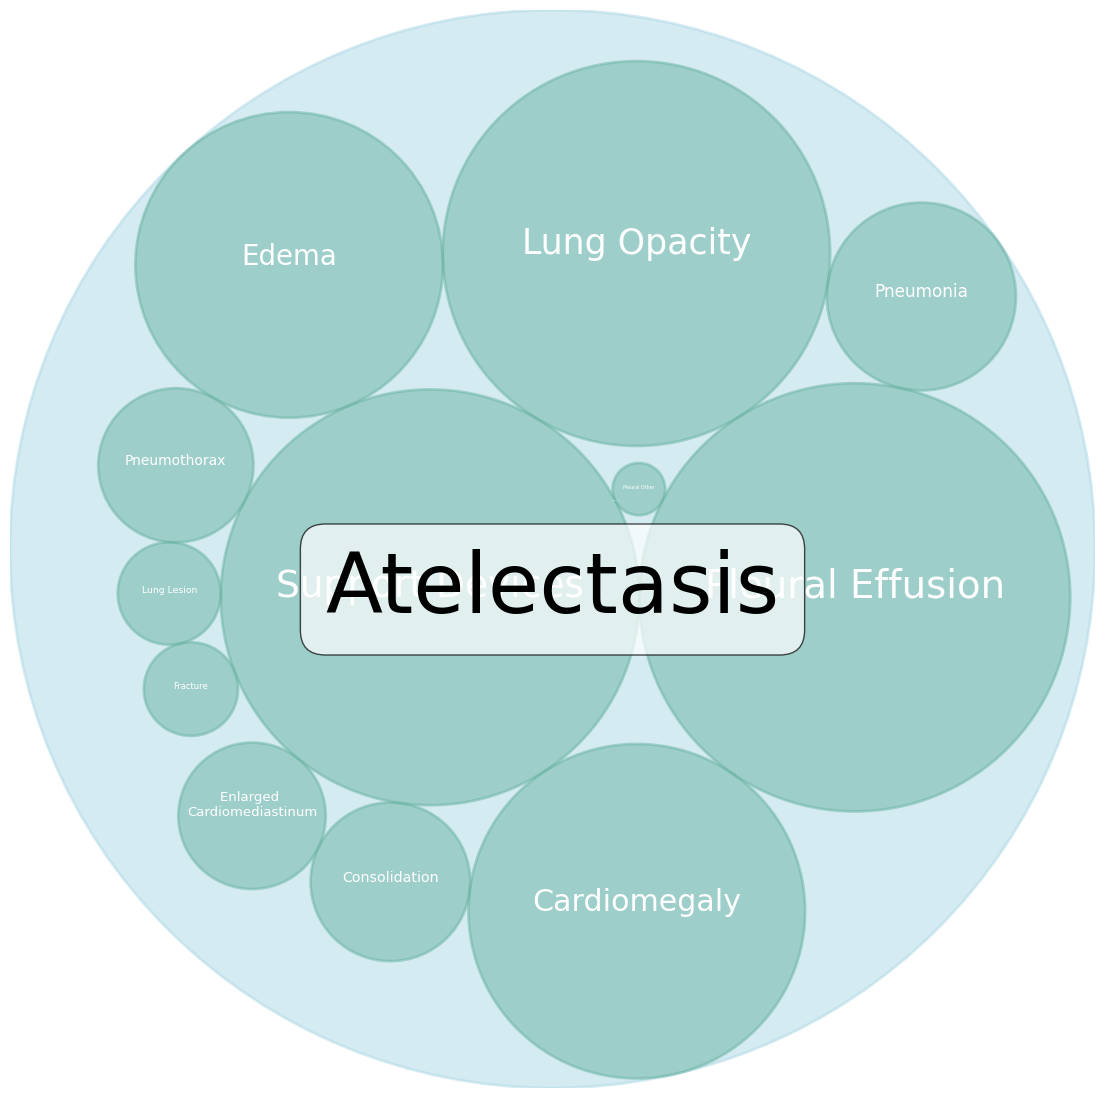

In [37]:
# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
# ax.set_title('Correlation between Lung Opacity with other labels')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white", size = r*70)

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.7,),size = 60)




min to max ratio is too low at 0.000000 and it could cause algorithm stability issues. Try to remove insignificant data


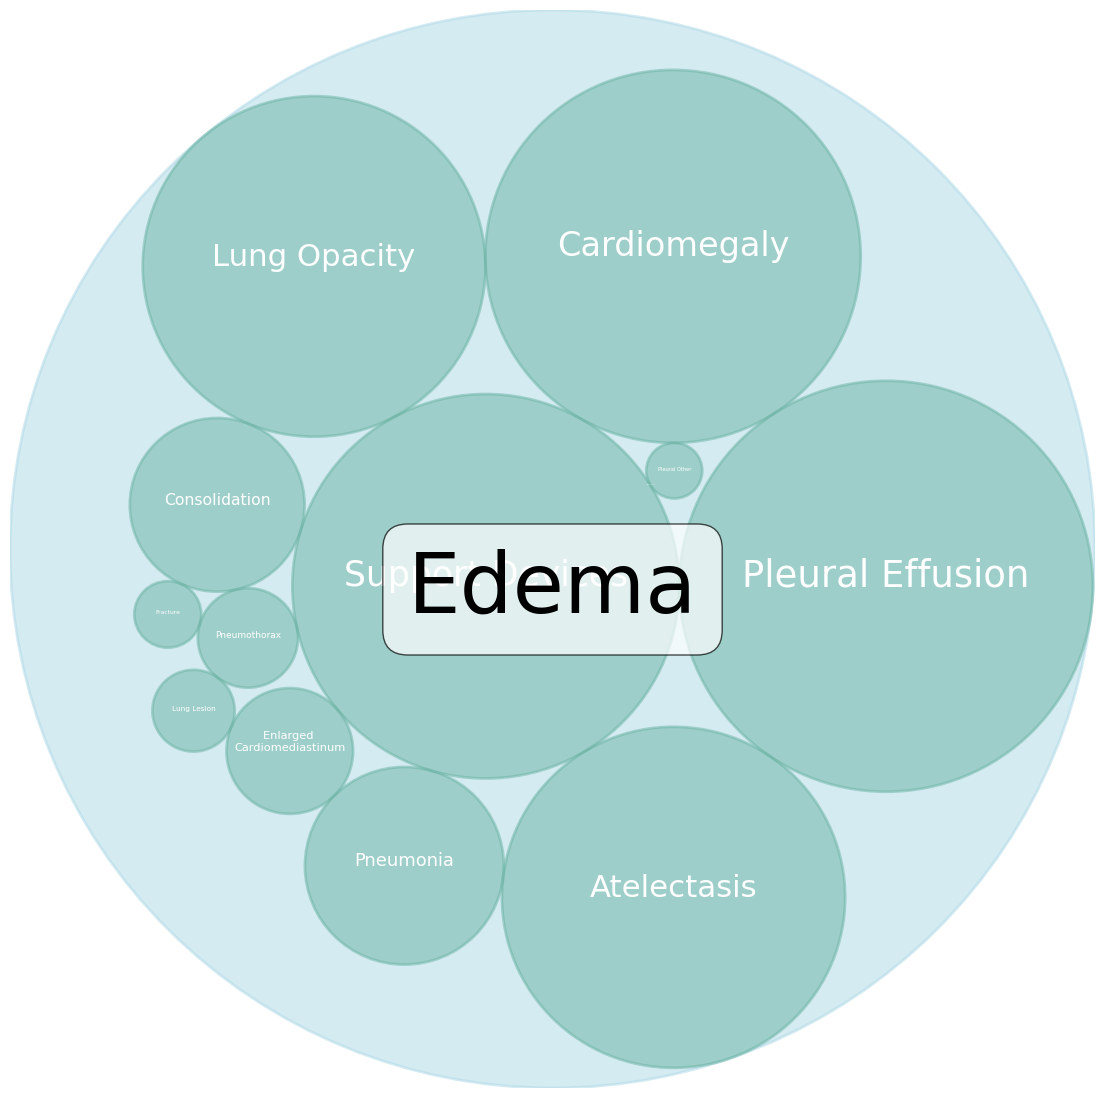

In [44]:
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    Edema, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
# ax.set_title('Correlation between Lung Opacity with other labels')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white", size = r*70)

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.7,),size = 60)




min to max ratio is too low at 0.000000 and it could cause algorithm stability issues. Try to remove insignificant data


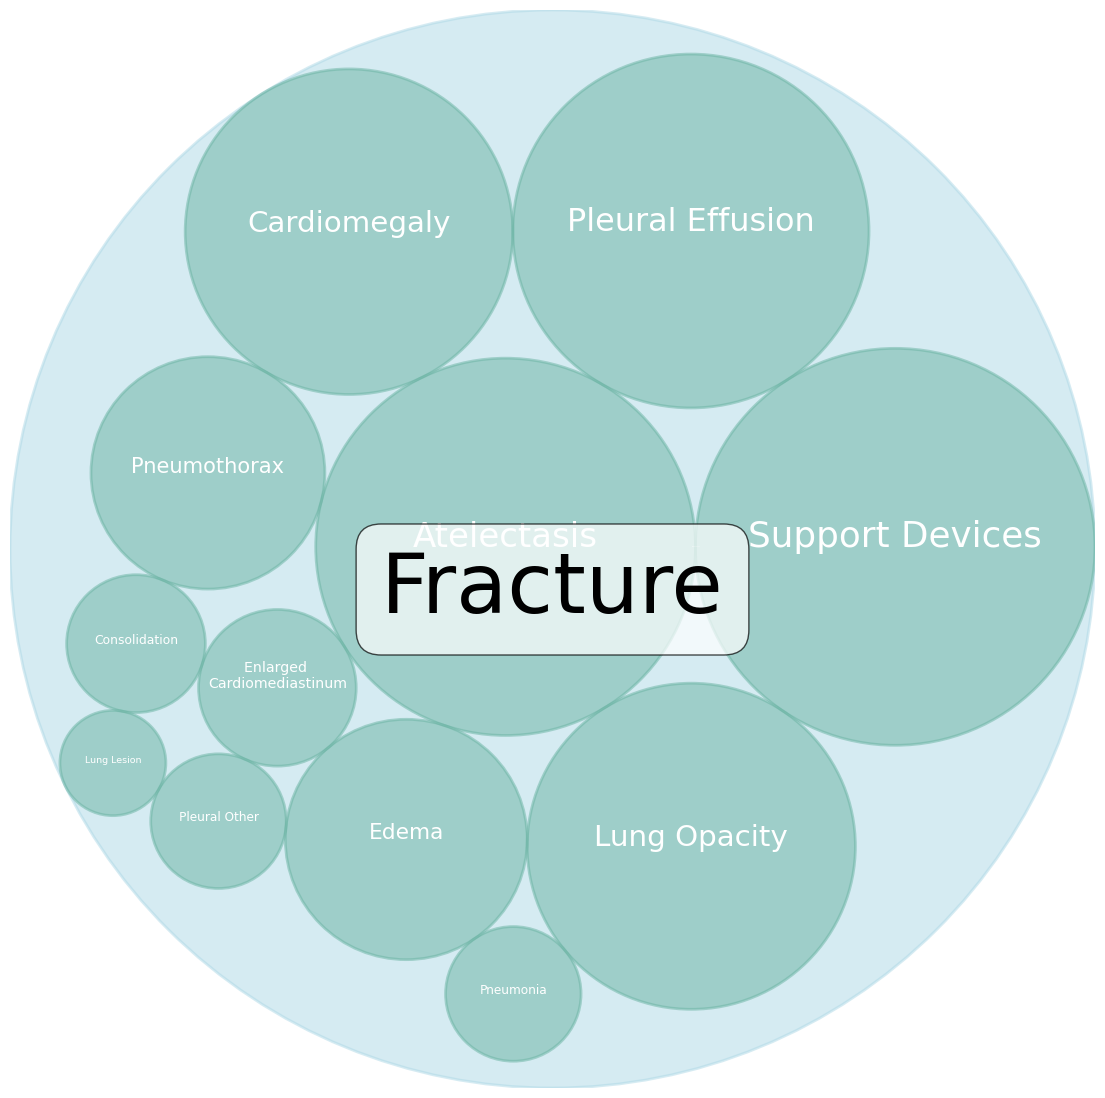

In [45]:
import circlify

# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    Fracture, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# import libraries
import circlify
import matplotlib.pyplot as plt

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
# ax.set_title('Correlation between Lung Opacity with other labels')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x,y ), ha='center', color="white", size = r*70)

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', alpha=0.7,),size = 60)


